In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-data-of-gender-inequality-index/Gender Inequality Index.csv


# Loading Data and Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install country_converter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.5 MB/s eta 0:00:00


In [4]:
import country_converter as coco

In [5]:
df = pd.read_csv("/kaggle/input/world-data-of-gender-inequality-index/Gender Inequality Index.csv",encoding='cp1252')

<div class="alert alert-block alert-info"> 📌 We Used a different encoding method as the data is not properly encoded in the Default UTF-8 format</div>

# Preface

<div class="alert alert-block alert-info">  Debates and Arguments about Gender Inequality have been around for decades. Heating Arguments have often been present by members of both sex groups. In this notebook , We will us statistical data to shed light on differences between genders in different countries all over the world over different metrics.





 </div>

# Data Preprocessing and cleaning

In [6]:
# Let's see what the data looks like
df.head()

,HDI rank,Country,HUMAN DEVELOPMENT,GII VALUE,GII RANK,Maternal_mortality,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Unnamed: 12
0,1,Switzerland,VERY HIGH,0.018,3,5,2.2,39.8,96.9,97.5,61.7,72.7,NaN
1,2,Norway,VERY HIGH,0.016,2,2,2.3,45.0,99.1,99.3,60.3,72.0,NaN
2,3,Iceland,VERY HIGH,0.043,8,4,5.4,47.6,99.8,99.7,61.7,70.5,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,..,..,..,1.6,..,77.1,83.4,53.5,65.8,NaN
4,5,Australia,VERY HIGH,0.073,19,6,8.1,37.9,94.6,94.4,61.1,70.5,NaN


<div class="alert alert-block alert-info"> 📌 There is a useless unnamed column at -1 position with all NaN values<br>📌 Null Values are marked as ..</div>

In [7]:
#reading the data again with the appropriate Null Value
df = pd.read_csv('/kaggle/input/world-data-of-gender-inequality-index/Gender Inequality Index.csv',na_values=['..'],encoding='cp1252')

In [8]:
#checking what data looks like again to avoid any errors
df.head()

,HDI rank,Country,HUMAN DEVELOPMENT,GII VALUE,GII RANK,Maternal_mortality,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,Unnamed: 12
0,1,Switzerland,VERY HIGH,0.018,3.0,5,2.2,39.8,96.9,97.5,61.7,72.7,NaN
1,2,Norway,VERY HIGH,0.016,2.0,2,2.3,45.0,99.1,99.3,60.3,72.0,NaN
2,3,Iceland,VERY HIGH,0.043,8.0,4,5.4,47.6,99.8,99.7,61.7,70.5,NaN
3,4,"Hong Kong, China (SAR)",VERY HIGH,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8,NaN
4,5,Australia,VERY HIGH,0.073,19.0,6,8.1,37.9,94.6,94.4,61.1,70.5,NaN


In [9]:
#fixing unnamed columns
df = df.iloc[:,:-1]

In [10]:
#Let's check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HDI rank                            195 non-null    int64  
 1   Country                             195 non-null    object 
 2   HUMAN DEVELOPMENT                   195 non-null    object 
 3   GII VALUE                           170 non-null    float64
 4   GII RANK                            170 non-null    float64
 5   Maternal_mortality                  184 non-null    object 
 6   Adolescent_birth_rate               195 non-null    float64
 7   Seats_parliamentt(% held by women)  193 non-null    float64
 8   F_secondary_educ                    177 non-null    float64
 9   M_secondary_educ                    177 non-null    float64
 10  F_Labour_force                      180 non-null    float64
 11  M_Labour_force                      180 non-n

<div class="alert alert-block alert-info"> 📌 Maternal Mortality has been wrongly marked as string. Let's fix that in the coming block</div>

<div class="alert alert-block alert-info"> 📌 A bad line error occured while converting due to wrongly inputted data in multiple rows. Let's remove this feature for now</div>

In [11]:
df = df.drop("Maternal_mortality",axis="columns")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   HDI rank                            195 non-null    int64  
 1   Country                             195 non-null    object 
 2   HUMAN DEVELOPMENT                   195 non-null    object 
 3   GII VALUE                           170 non-null    float64
 4   GII RANK                            170 non-null    float64
 5   Adolescent_birth_rate               195 non-null    float64
 6   Seats_parliamentt(% held by women)  193 non-null    float64
 7   F_secondary_educ                    177 non-null    float64
 8   M_secondary_educ                    177 non-null    float64
 9   F_Labour_force                      180 non-null    float64
 10  M_Labour_force                      180 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usa

In [13]:
#Let's check for null values
df.isna().sum()

HDI rank                               0
Country                                0
HUMAN DEVELOPMENT                      0
GII VALUE                             25
GII RANK                              25
Adolescent_birth_rate                  0
Seats_parliamentt(% held by women)     2
F_secondary_educ                      18
M_secondary_educ                      18
F_Labour_force                        15
M_Labour_force                        15
dtype: int64

<div class="alert alert-block alert-info"> 📌 We observe multiple NaN Values. Let's try to fill them using mean and median imputation</div>

In [14]:
# finding mean and median values
# using median for rank as it is a better method in this use case because of the nature of ranks 
mean_gii = df['GII VALUE'].mean()
median_girank = df["GII RANK"].median()
mean_seats = df['Seats_parliamentt(% held by women)'].mean()
mean_fedu = df['F_secondary_educ'].mean()
mean_medu = df['M_secondary_educ'].mean()
mean_fla = df['F_Labour_force'].mean()
mean_mla = df['M_Labour_force'].mean()

In [15]:
# Filling in the values
df['GII VALUE'] = df['GII VALUE'].fillna(mean_gii)
df['GII RANK'] = df['GII RANK'].fillna(median_girank)
df['Seats_parliamentt(% held by women)'] = df['Seats_parliamentt(% held by women)'].fillna(mean_seats)
df['F_secondary_educ'] = df['F_secondary_educ'].fillna(mean_fedu)
df['M_secondary_educ'] = df['M_secondary_educ'].fillna(mean_medu)
df['F_Labour_force'] = df['F_Labour_force'].fillna(mean_fla)
df['M_Labour_force'] = df['M_Labour_force'].fillna(mean_mla)

In [16]:
df.isna().sum()

HDI rank                              0
Country                               0
HUMAN DEVELOPMENT                     0
GII VALUE                             0
GII RANK                              0
Adolescent_birth_rate                 0
Seats_parliamentt(% held by women)    0
F_secondary_educ                      0
M_secondary_educ                      0
F_Labour_force                        0
M_Labour_force                        0
dtype: int64

# Numerical Data Analysis

In [17]:
# How does the data look like mathematically?
df.describe()

,HDI rank,GII VALUE,GII RANK,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,97.815385,0.344376,85.392308,44.597949,24.701554,62.706780,67.068362,50.224444,69.863333
std,56.467551,0.183967,45.930149,38.422479,12.340214,28.125268,25.193104,15.278219,8.657295
min,1.000000,0.013000,1.000000,1.600000,0.000000,6.400000,13.000000,6.000000,43.900000
25%,49.500000,0.201500,49.500000,10.750000,16.600000,40.950000,49.050000,43.350000,65.500000
50%,97.000000,0.344376,85.500000,36.200000,23.800000,62.706780,68.700000,50.700000,69.863333
75%,146.000000,0.485500,121.500000,64.200000,33.450000,88.350000,91.250000,59.500000,75.250000
max,195.000000,0.820000,170.000000,170.500000,55.700000,100.000000,100.000000,83.100000,95.500000


In [18]:
#checking for duplicated values
df.duplicated().sum()

0

In [19]:
#checking the relationship between columns with GII Index
df.corr()['GII VALUE']

/tmp/ipykernel_20/904508209.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['GII VALUE']


HDI rank                              0.852925
GII VALUE                             1.000000
GII RANK                              0.996755
Adolescent_birth_rate                 0.766821
Seats_parliamentt(% held by women)   -0.396225
F_secondary_educ                     -0.802017
M_secondary_educ                     -0.774983
F_Labour_force                       -0.066341
M_Labour_force                        0.144552
Name: GII VALUE, dtype: float64

# Univariate Analysis

In [20]:
ex_level = df['HUMAN DEVELOPMENT'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values, 
                title = 'Level of Human Development')
fig.show()

<div class="alert alert-block alert-info"> 📌 Majority of the countries have high to very high level of human development</div>

-0.017830965410687634

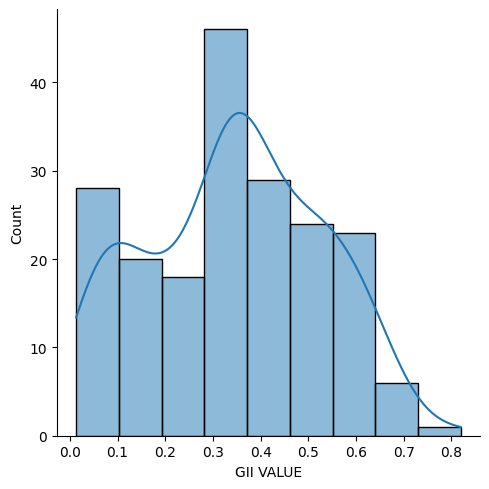

In [21]:
sns.displot(df['GII VALUE'] , kde=True)
df['GII VALUE'].skew()

<div class="alert alert-block alert-info"> 📌 There is no major skewness in this feature except the very high index countries which are probable outliers</div>

1.0669316484231446

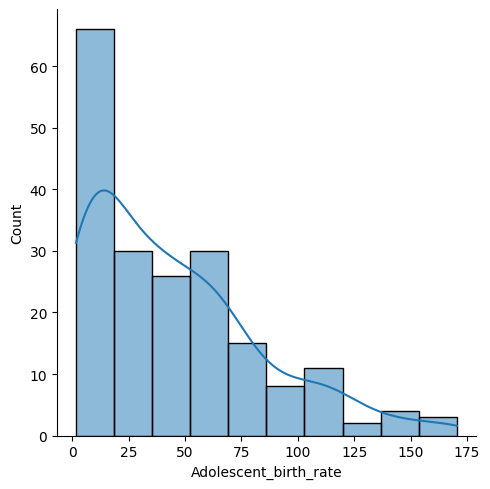

In [22]:
sns.displot(df['Adolescent_birth_rate'] , kde=True)
df['Adolescent_birth_rate'].skew()

<div class="alert alert-block alert-info"> 📌 We observe that this feature is extremely right skewed which signifies an overall less adolescent birth rate in majority of the countries</div>

0.17849226587867564

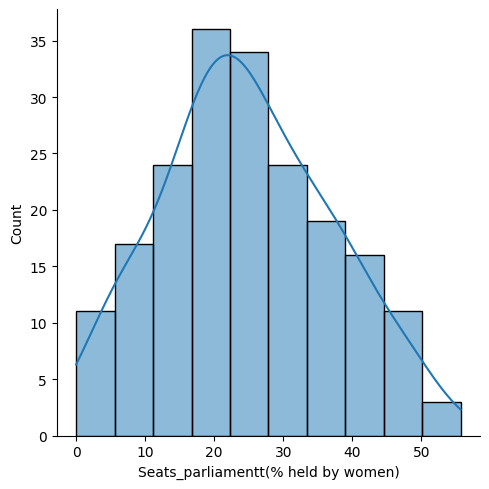

In [23]:
sns.displot(df['Seats_parliamentt(% held by women)'] , kde=True)
df['Seats_parliamentt(% held by women)'].skew()

<div class="alert alert-block alert-info"> 📌 About 25-30% seats are occupied in parliament which show heavy male bias in a lot of countries</div>

In [24]:
# converting country column to appropriate format 
country = coco.convert(names = df['Country'], to = "ISO3")
df['Country'] = country

In [25]:
residence = df['Country'].value_counts()
fig = px.choropleth(locations = residence.index,
                    color = residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Country Location')
fig.show()

<div class="alert alert-block alert-info"> 📌 This map shows that our analysis does not miss any country in the world </div>

# Multivariate Analysis

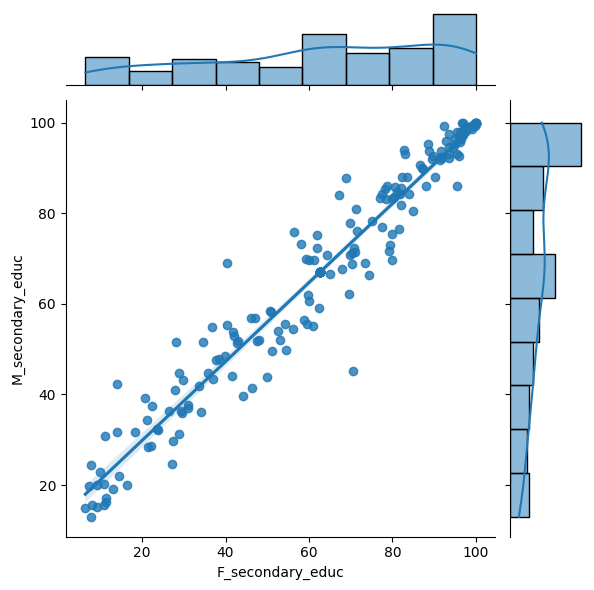

In [26]:
sns.jointplot(x='F_secondary_educ' , y = 'M_secondary_educ' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 We observe a strong linear relation between the education levels of men and woman which debunks the myth that education is gender biased in most countries</div>

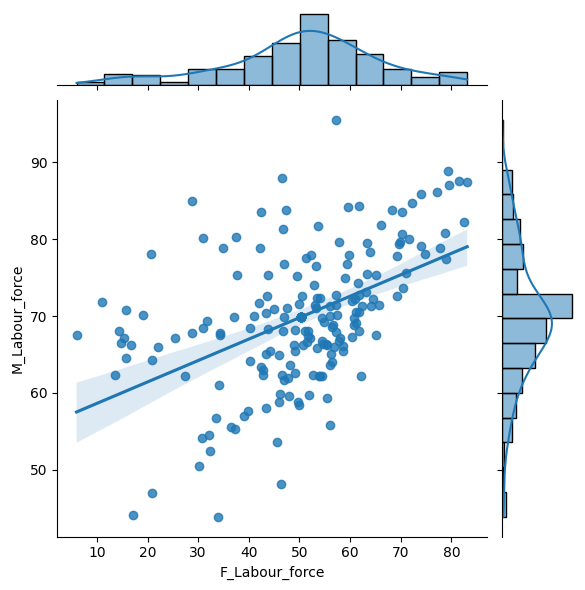

In [27]:
sns.jointplot(x='F_Labour_force' , y = 'M_Labour_force' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 This graph makes it clear that most countries have a high male labour force percentage as compared to the female counterparts </div>

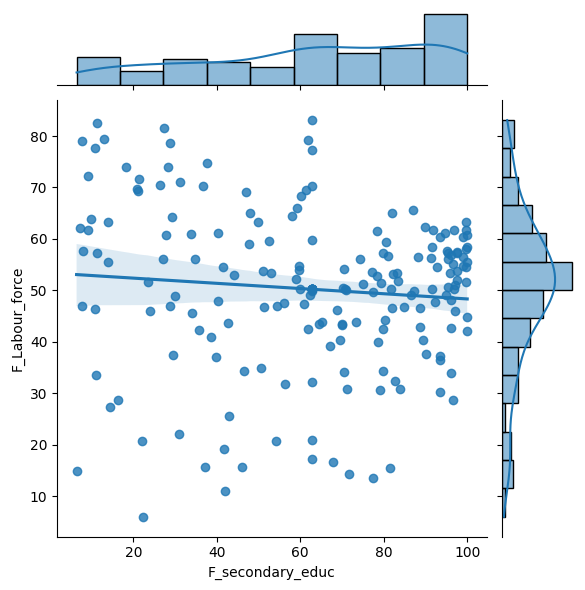

In [28]:
sns.jointplot(x='F_secondary_educ' , y = 'F_Labour_force' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 We are unable to deduce a proper relation between female education levels and labour force across almost all countries. There is a minor decrease in the labour force levels as the education levels increase </div>

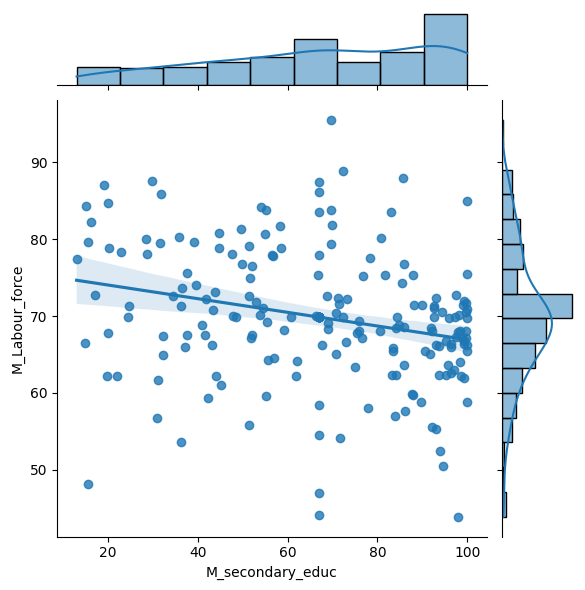

In [29]:
sns.jointplot(x='M_secondary_educ' , y = 'M_Labour_force' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 A similar situation is observed for men except the decrease is a little more </div>

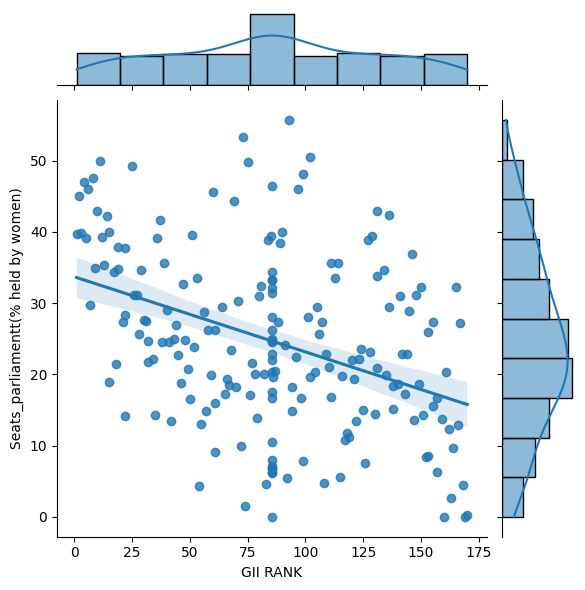

In [30]:
sns.jointplot(x='GII RANK' , y = 'Seats_parliamentt(% held by women)' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 We observe that the share of women in parliament decreases as the GII rank of a country worsens </div>

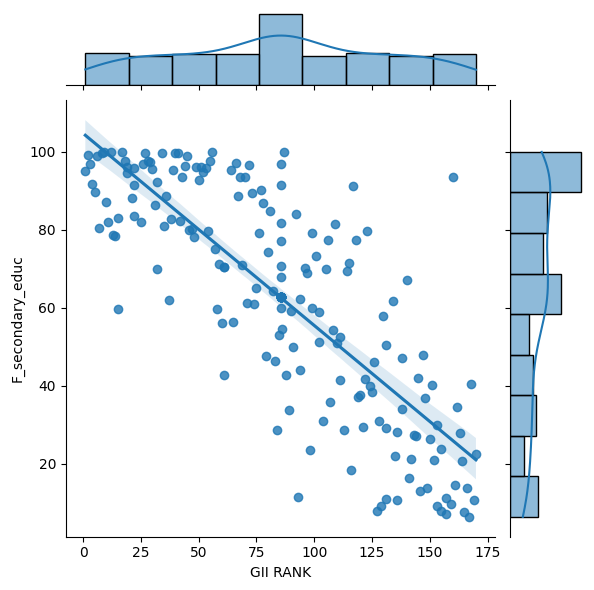

In [31]:
sns.jointplot(x='GII RANK' , y = 'F_secondary_educ' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 We observe a strong correlation between female education standards and GII rank of countries. Better Education oppurtunities again proves to be a way to improve gender inequality conditions in a country</div>

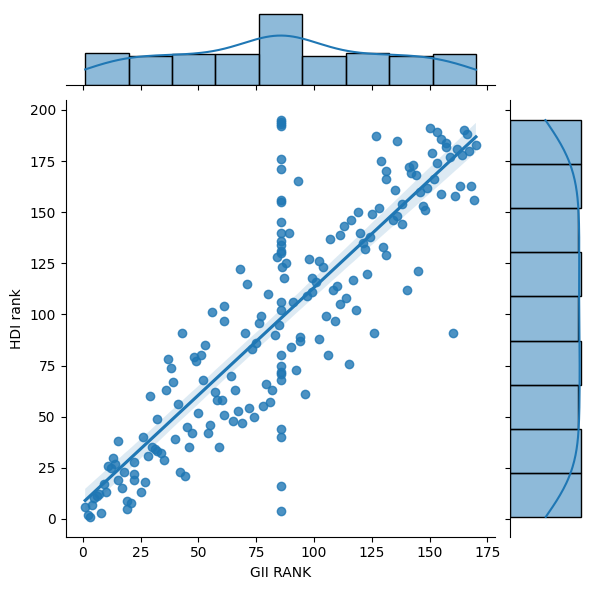

In [32]:
sns.jointplot(x='GII RANK' , y = 'HDI rank' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 We observe a very strong positive relation between human development ranking and Gender inequality ranking. This signifies that equality reforms in a country leads to it's overall growth</div>

In [33]:
df.sample(5)

,HDI rank,Country,HUMAN DEVELOPMENT,GII VALUE,GII RANK,Adolescent_birth_rate,Seats_parliamentt(% held by women),F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force
191,192,PRK,OTHER,0.344376,85.5,2.3,17.6,62.70678,67.068362,77.200000,86.100000
104,105,PRY,HIGH,0.445000,111.0,70.3,16.8,52.50000,54.000000,59.600000,84.200000
38,39,LVA,VERY HIGH,0.151000,40.0,11.2,29.0,99.70000,99.300000,54.500000,66.800000
92,91,TON,HIGH,0.631000,160.0,19.0,0.0,93.50000,93.100000,37.300000,55.300000
193,194,NRU,OTHER,0.344376,85.5,72.5,10.5,62.70678,67.068362,50.224444,69.863333


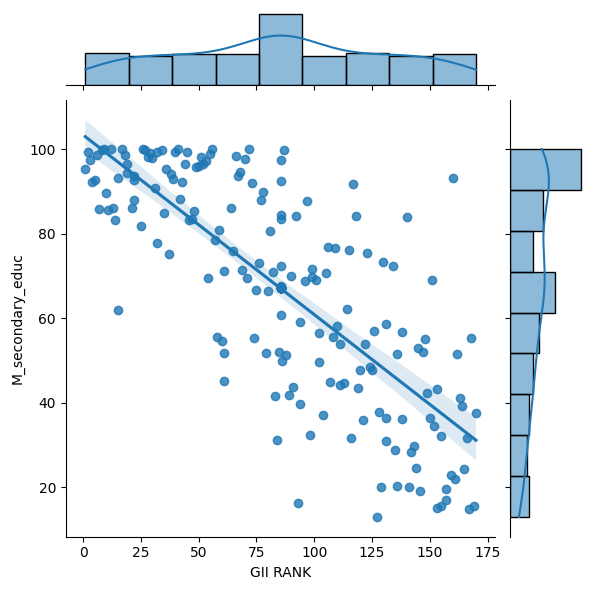

In [34]:
sns.jointplot(x='GII RANK' , y = 'M_secondary_educ' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 This graph clearly shows that educating the male population also helps in improving the gender equality stats. It debunks a common myth about male patriarchy as educated men always believe in equal status for both genders </div>

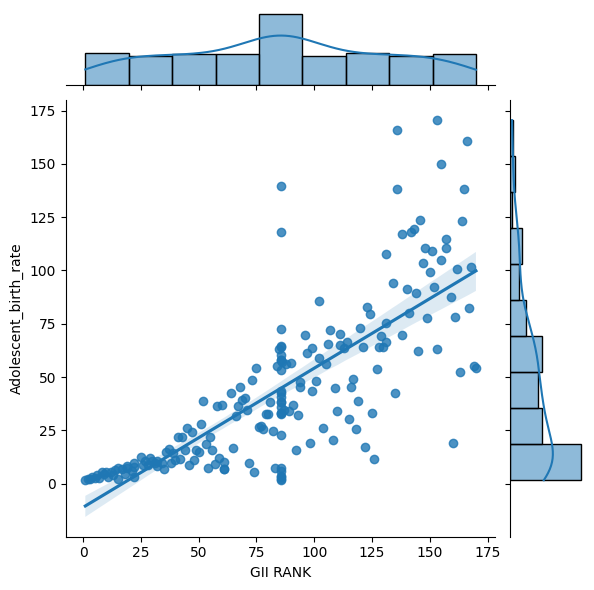

In [35]:
sns.jointplot(x='GII RANK' , y = 'Adolescent_birth_rate' , data=df , kind="reg")

<div class="alert alert-block alert-info"> 📌 The adoloscent birth rate gradually increases as the GII rank of a country worsens which shows the need to focus on equality forms to imrprove in this sector </div>

# Conclusion

<div class="alert alert-block alert-info">This analysis clearly indicates the needs and avantages that focusing on gender equality conditions of a country lead to. Imparting Education equally for both sexes proves to be the best way for a country to achieve this goal.
<br><hr>
Thank you for visiting this notebook. Please upvote and share your feedback as it will immensly help me learn and grow :)
</div>